In [2]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sy


#Aproximación de $\pi$

In [3]:
def leibniz(N):
  x = np.arange(1, N, 4)
  xp = np.arange(3,N, 4)
  return 4*(np.sum(1/x)-np.sum(1/xp))

print(leibniz(1000000))

3.141590653589793


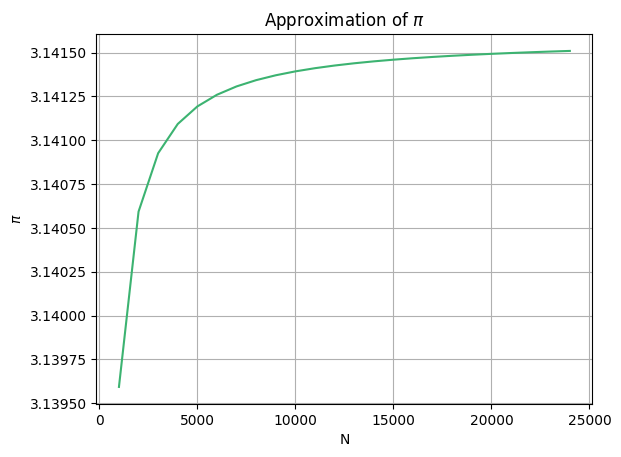

In [4]:
N = np.arange(1000, 25000, 1000)
pi = np.zeros(len(N))
for i, n in enumerate(N):
  pi[i] = leibniz(n)

plt.plot(N, pi, color='mediumseagreen')
plt.title('Approximation of $\pi$')
plt.xlabel('N')
plt.ylabel('$\pi$')
plt.grid()
plt.show()

#Eliminación de Gauss-Jordan

In [5]:
np.random.seed(10)
A = 1.0*np.random.randint(1,20, (4,4))
A1 = sy.Matrix(A)
display(A1)

Matrix([
[10.0,  5.0, 16.0,  1.0],
[18.0, 17.0, 18.0,  9.0],
[10.0,  1.0, 11.0,  9.0],
[ 5.0, 17.0,  5.0, 16.0]])

In [8]:
def pivote(m):

    if A[m,m] != 0 :
        A[m] = A[m] / A[m,m]
    return A[m]

def resta(m, filas):

    for i in range(filas):
        if i != m:
            A[i] = A[i] - A[i,m] * A[m]

def eliminacion(A):

    filas, columnas = A.shape

    for m in range(filas):
        pivote(m)

        resta(m,filas)

    A = sy.Matrix(A)
    display(A)

In [9]:
eliminacion(A)

Matrix([
[1.0, 0.0, 0.0, 0.0],
[0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 1.0]])

#Multiplicación Matricial

In [10]:
def mat_mult(A, B):
    if len(A[0]) != len(B):
        raise ValueError("El número de columnas de A debe ser igual al número de filas de B")

    filas_A = len(A)
    columnas_A = len(A[0])
    columnas_B = len(B[0])

    resultado = [[0 for x in range(columnas_B)] for x in range(filas_A)]

    for i in range(filas_A):
        for j in range(columnas_B):
            for k in range(columnas_A):
                resultado[i][j] += A[i][k] * B[k][j]

    return resultado

In [11]:
np.random.seed(10)
B = 1.0*np.random.randint(1,20, (4,4))
C = 1.0*np.random.randint(1,20, (4,4))

B1= sy.Matrix(B)
C1 = sy.Matrix(C)

display(B1,C1)

Matrix([
[10.0,  5.0, 16.0,  1.0],
[18.0, 17.0, 18.0,  9.0],
[10.0,  1.0, 11.0,  9.0],
[ 5.0, 17.0,  5.0, 16.0]])

Matrix([
[12.0, 12.0,  2.0,  9.0],
[ 5.0, 15.0, 18.0, 14.0],
[ 6.0, 14.0, 14.0, 13.0],
[ 2.0,  5.0, 19.0, 14.0]])

In [14]:
mat_mult(A,B)

[[10.0, 5.0, 16.0, 1.0],
 [18.0, 17.0, 18.0, 9.0],
 [10.0, 1.0, 11.0, 9.0],
 [5.0, 17.0, 5.0, 16.0]]

#Regresión Lineal

In [12]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise

In [13]:
def transpuesta(A):
  return np.transpose(A)

def inversa(A):
  return np.linalg.inv(A)

def theta(X, Y):
  x_transp = transpuesta(X)

  term1 = x_transp@X

  T = inversa(term1)

  term2 = x_transp@Y

  return T@term2

theta_0 (intercepto): -0.13679094187285457
theta_1 (pendiente): 0.903249626370531
Valores predichos: [-0.13679094  0.86681975  1.87043045  2.87404115  3.87765184  4.88126254
  5.88487323  6.88848393  7.89209463  8.89570532]


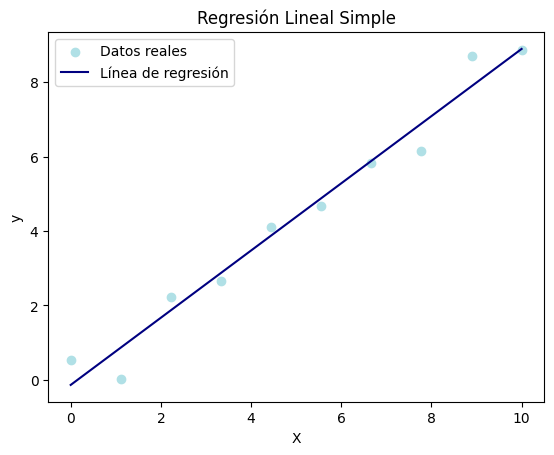

In [15]:
def regresion_lineal_matricial(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Calcular theta
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    return theta

theta = regresion_lineal_matricial(x1, y)

print(f"theta_0 (intercepto): {theta[0]}")
print(f"theta_1 (pendiente): {theta[1]}")

# Predicción
def predecir(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

y_pred = predecir(x1, theta)
print("Valores predichos:", y_pred)

plt.scatter(x1, y, color='powderblue', label='Datos reales')
plt.plot(x1, y_pred, color='navy', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()